In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [10]:
pic_orig = cv2.cvtColor(cv2.imread('../data/Dark.jpg'),cv2.COLOR_BGR2RGB)
res_ratio = 0.4
pic_res = cv2.resize(pic_orig,(0,0),pic_orig,res_ratio,res_ratio,interpolation=cv2.INTER_AREA)

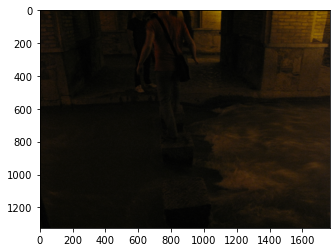

In [11]:
plt.imshow(pic_res)

In [12]:
def optimize(pic,beta):
    mapper = lambda x: np.uint8(round(abs(math.log(float(x)/255*(beta-1)+1)/math.log(beta)*255)))
    return np.vectorize(mapper)(pic)

In [13]:
l = [5,25,125,625]
n = len(l)
pics = [(1,pic_res)]
pics.extend([(b,optimize(pic_res,b)) for b in l])

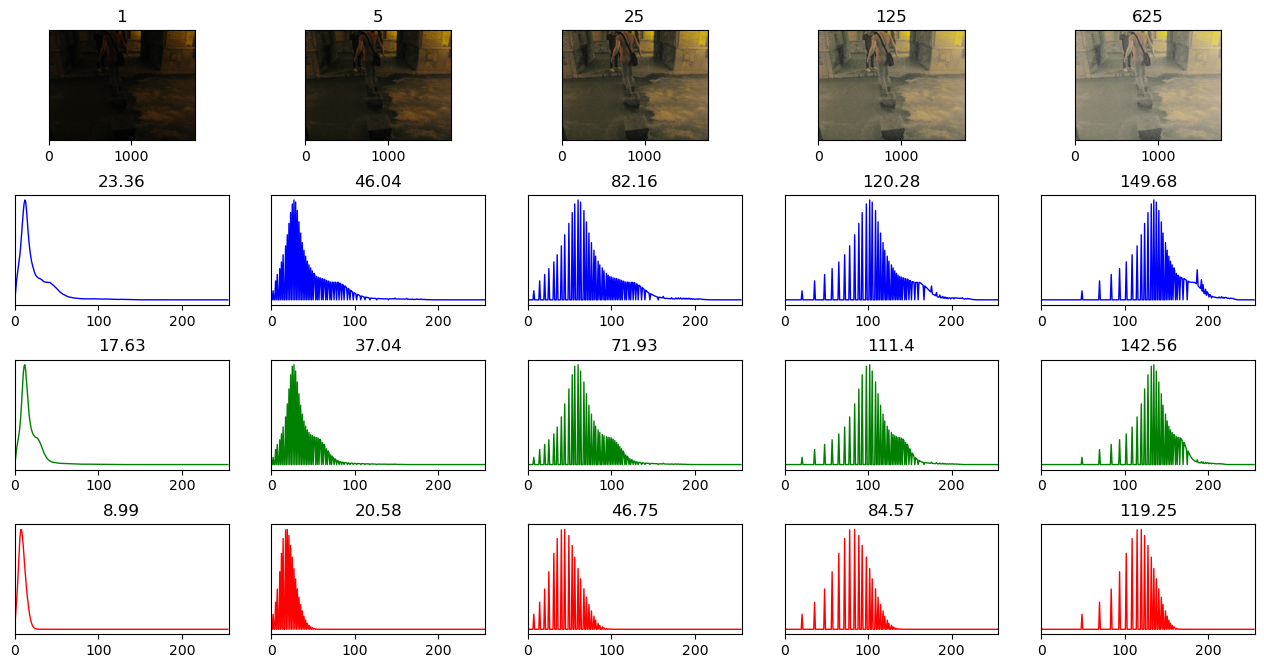

In [14]:
fig = plt.figure(figsize=(16,8),dpi=100)
gs = fig.add_gridspec(4, n+1,hspace=.5)
plts = gs.subplots()

for *i,p in np.ndenumerate(plts):
    p.get_yaxis().set_visible(False)
    p.set_yticklabels([])

color = ('b','g','r')
for i,pic in enumerate(pics):
    p = plts[0][i]
    p.imshow(pic[1])
    p.set_title(pic[0])
    
    for j,col in enumerate(color):
        histr = cv2.calcHist([pic[1]],[j],None,[256],[0,256])
        plts[j+1][i].plot(histr,color = col,linewidth=1)
        plts[j+1][i].set_title(round(((histr * np.arange(256).reshape((256,1))).sum())/histr.sum(),2))
        plts[j+1][i].set_xlim([0,256])

plt.show()

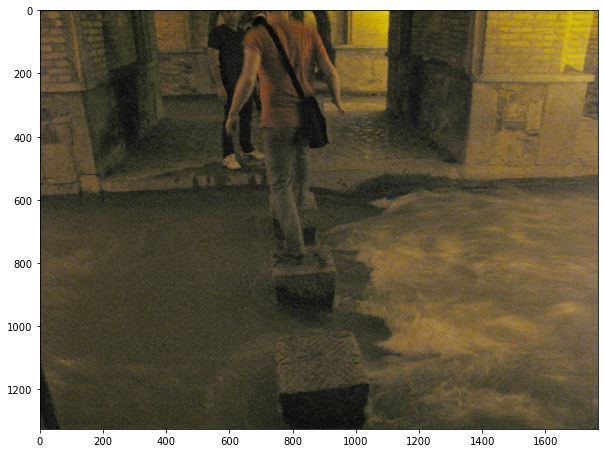

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(pics[2][1])

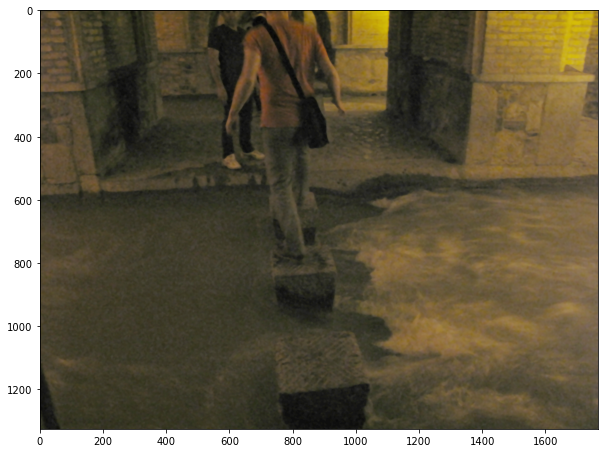

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.medianBlur(pics[2][1],7))